In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_path="AppleSDGothicNeoM.ttf" #파일 필요
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [3]:
class Seperate:
    def __init__(self, df):
        self.df = df
     
    def this_month(self):
        return self.df[self.df.upload_ym == '2021-09'].reset_index(drop=False)


In [4]:
df = pd.read_excel("df_token_2.xlsx")

- upload_datetime : 24시간 내 자료에만 사용
- upload_date : 한달 내 자료에만 사용
- upload_ym : 한달 단위 자료에만 사용

In [5]:
df.head(5)
df.shape

(67421, 19)

# 월별 물량추이

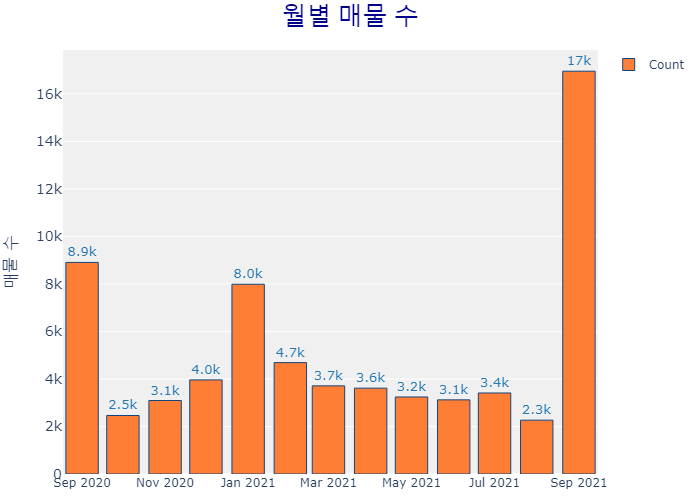

월별 물량 추이


In [6]:
data = df.groupby('upload_ym').title.count().reset_index()

fig = go.Figure()

# fig.add_trace(
#     go.Bar(
#         x=data['upload_ym'],
#         y=data['title'],
#         name="Count",
#         text = data['title'],
#         textposition='outside',
#         textfont=dict(
#         size=13,
#         color='#EC7B3E')
#     ))
# fig.update_traces(texttemplate='%{text:.2s}')
# fig.update_layout(
#                  title_text='2009-2019 Financial Report')
# fig.show()


fig.add_trace(
    go.Bar(
        x=data['upload_ym'],
        y=data['title'],
        name="Count",
        text = data['title'],
        textposition='outside',
        textfont=dict(
        size=13,
        color='#1f77b4'),      
        marker_color=['#FF7E36','#FF7E36','#FF7E36','#FF7E36','#FF7E36','#FF7E36'
                     ,'#FF7E36','#FF7E36','#FF7E36','#FF7E36','#FF7E36','#FF7E36','#FF7E36'],
        marker_line_color='rgb(17, 69, 126)',
        marker_line_width=1, 
        opacity=1.0
    ))
# strip down the rest of the plot
fig.update_layout(
    showlegend=True,
    plot_bgcolor="rgb(240,240,240)",
    margin=dict(t=50,l=10,b=10,r=10),
    title_text='월별 매물 수',
    title_font_family="AppleSDGothicNeoM",
    title_font_size = 25,
    title_font_color="darkblue",
    title_x=0.5,
#     xaxis=dict(
#         tickfont_size=14,
#         tickangle = 270,
#         showgrid = True,
#         zeroline = True,
#         showline = True,
#         showticklabels = True,
#         dtick=1
#     ),
    yaxis=dict(
        title='매물 수',
        titlefont_size=16,
        tickfont_size=14
    ),
#     legend=dict(
#         x=0.01,
#         y=0.99,
#         bgcolor='rgba(255, 255, 255, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
    bargap=0.15
)
fig.update_traces(texttemplate='%{text:.2s}')
fig.show('png')

# fig = px.bar(data, x='upload_ym', y='title',
#              color='title',
#              labels={'pop':'population of Canada'}, height=600)
# fig.show()


# ym = df.groupby('upload_ym').title.count().to_frame()
# ym.plot.bar()
print('월별 물량 추이')

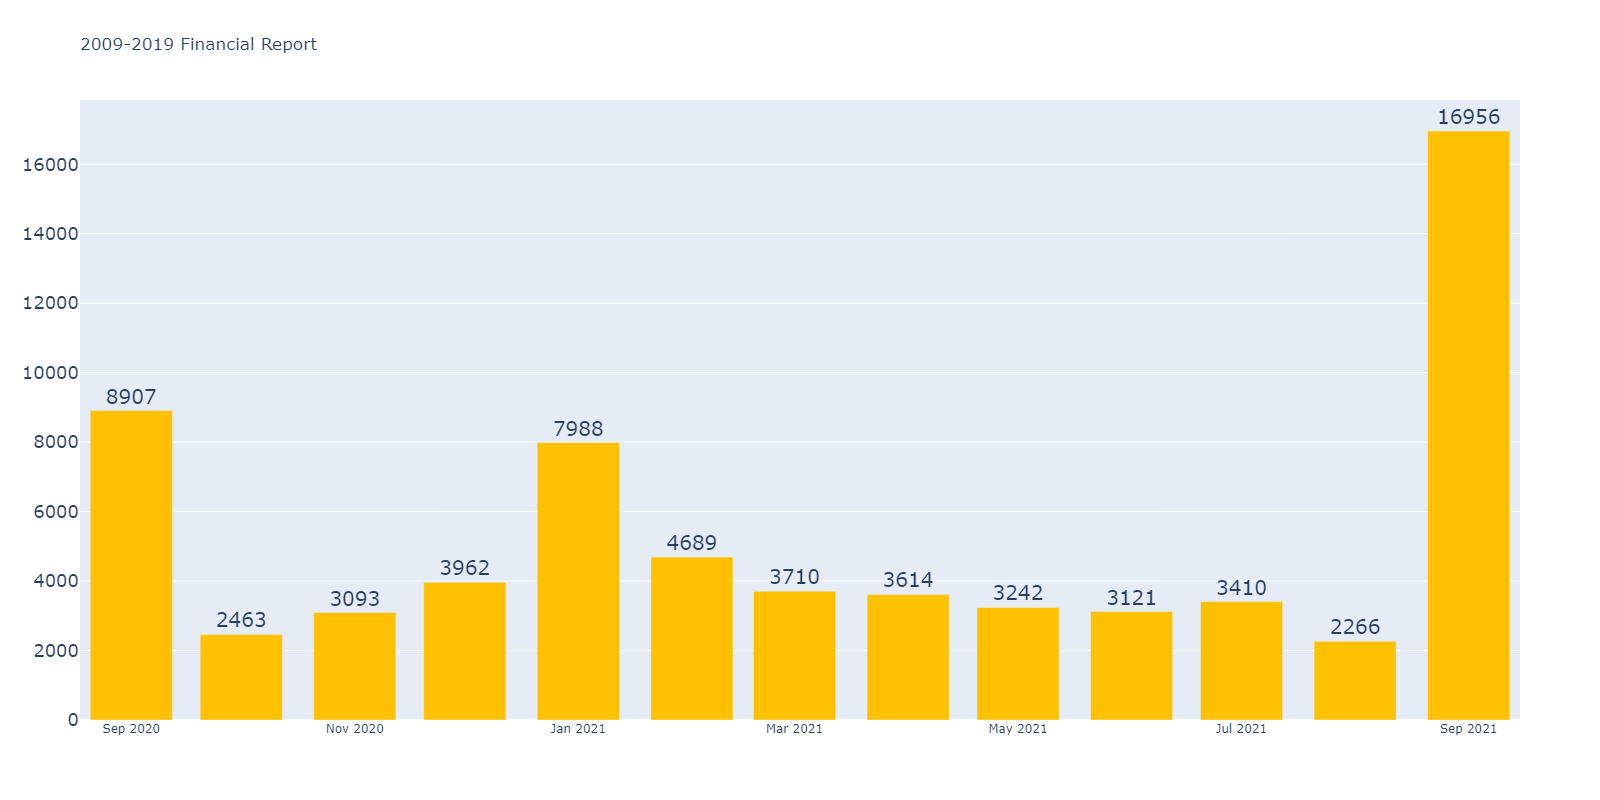

In [7]:
data = df.groupby('upload_ym').title.count().reset_index()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=data['upload_ym'],
        y=data['title'],
        name="Count",
        text = data['title'],
        textposition='outside',
        marker_color=['#ffc000',]*13,
        textfont=dict(
        size=20
        ) 
    ))
# fig.update_traces(texttemplate='%{text:.2s}')
fig.update_layout(
                 title_text='2009-2019 Financial Report', 
                 width=1600,
                height=800)
fig.update_yaxes(tickformat = "000", tickfont = dict(size=18))
fig.show('png')


In [9]:
data = df.groupby('upload_ym').title.count().reset_index()
data.to_excel('monthly_count.xlsx', index=False)

In [10]:
df.groupby('upload_ym').title.count().reset_index()

,upload_ym,title
0,2020-09,8907
1,2020-10,2463
2,2020-11,3093
3,2020-12,3962
4,2021-01,7988
5,2021-02,4689
6,2021-03,3710
7,2021-04,3614
8,2021-05,3242
9,2021-06,3121


In [11]:
plt.figure(figsize=(12,5), dpi= 80)
plt.fill_between(upload_ym.index, upoad_ym.title,
                color='skyblue', alpha=0.4)
plt.plot(ym, color="Slateblue",
         alpha=0.6, linewidth=2)

plt.tick_params(labelsize=12)

plt.xlabel('Year - Month', size=12)
plt.ylabel('Count', size=12)
plt.ylim(bottom=0)

plt.show()

NameError: name 'ym' is not defined

<Figure size 960x400 with 0 Axes>

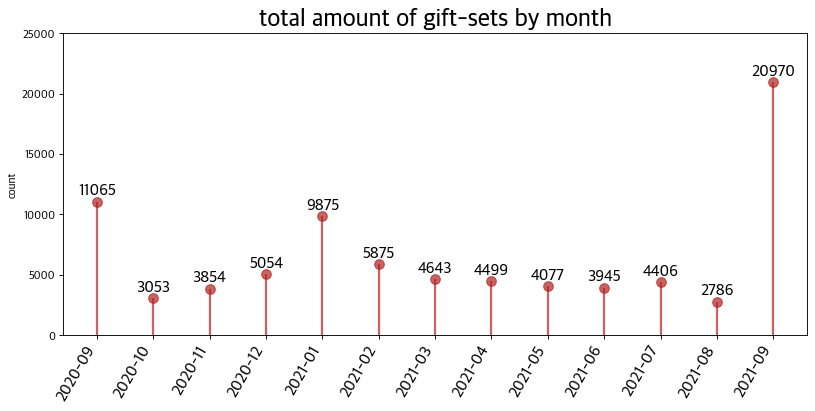

In [49]:
# Prepare Data
ym = df.groupby('upload_ym').title.count().to_frame()

# Draw plot
fig, ax = plt.subplots(figsize=(12,5), dpi= 80)
ax.vlines(x=ym.index, ymin=0, ymax=ym.title, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=ym.index, y=ym.title, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('total amount of gift-sets by month', fontdict={'size':22})
ax.set_ylabel('count')
ax.set_xticks(ym.index)
ax.set_xticklabels( ym.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_ylim(0, 25000)

# Annotate
for row in ym.itertuples():
    ax.text(row.Index, row.title+300, s=row.title, horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

# 한달 내 

In [29]:
a = Seperate(df)
this_month = a.this_month()
this_month.head(5)
this_month_group = this_month.groupby([this_month['upload_date'].dt.day, 'reup'])

In [30]:
this_month.groupby(this_month['upload_date'].dt.day).title.count()

upload_date
1      192
2      155
3      208
4      203
5      200
6      235
7      233
8      299
9      333
10     381
11     371
12     353
13     569
14     656
15     846
16     953
17     915
18     681
19     623
20     493
21     533
22     632
23     664
24     688
25     770
26     842
27     983
28     812
29    1059
30    1074
Name: title, dtype: int64

Text(0, 0.5, 'amount of articels')

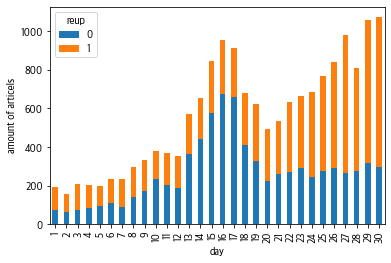

In [31]:
# 9/30일 기준 업로드 날짜 별 물량   

this_month_group.title.count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('day')
plt.ylabel('amount of articels')

In [32]:
this_month_group.title.count().to_excel('sep_daily_count.xlsx')

- 어느 순간부터 끌올 물량이 점점 많아지고 있다..

Text(0, 0.5, 'average of views')

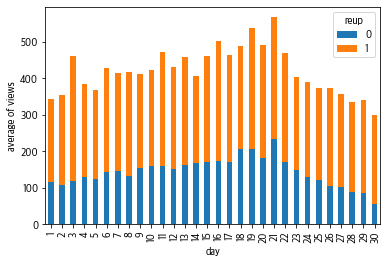

In [82]:
# 9/30일 기준 업로드 날짜 별 view 평균   

this_month_group.view.mean().unstack().plot(kind='bar', stacked=True)
plt.xlabel('day')
plt.ylabel('average of views')

Text(0, 0.5, 'average of interests')

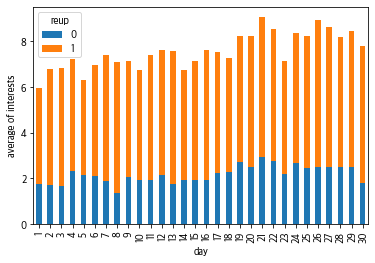

In [33]:
# 9/30일 기준 업로드 날짜 별 interest 평균   

this_month_group.interest.mean().unstack().plot(kind='bar', stacked=True)
plt.xlabel('day')
plt.ylabel('average of interests')

# 구별 물량 비교

<AxesSubplot:xlabel='region_gu'>

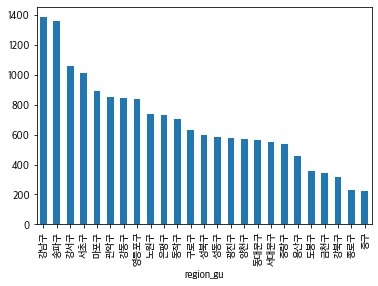

In [34]:
this_month.groupby('region_gu').title.count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='region_gu'>

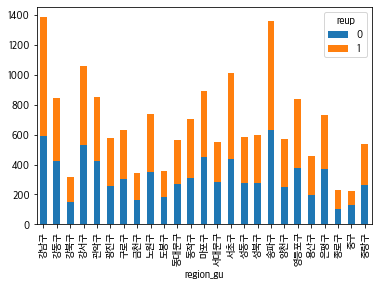

In [35]:
this_month.groupby(['region_gu', 'reup']).title.count().unstack().plot(kind='bar', stacked=True)

- 당근마켓의 침투율은 강남구가 99.1% 인데, 거주지 외 직장을 등록하는 경우가 많아 강남구 주민이 모두 이용한다고 볼 수 없다.

# 하루 중 시간대

In [77]:
# 9월 30일 데이터만 봤을 때 어느 시간대에 가장 많이 올리는지 
last_day = this_month[this_month['upload_date'].dt.day == 30]
last_day.head(2)

,index,num,region,title,category,time,price,detail,interest,chat,view,upload_datetime,upload_date,upload_ym,reup,region_gu
22,84,290281207,강남구 압구정동,청정원 선물세트,생활/가공식품,끌올 3시간 전,20000,청정원 선물세트 입니다 \n새상품이고 \n20000원에 드립니다,8,2,171,2021-09-30 20:59:59,2021-09-30,2021-09,1,강남구
26,94,292819438,강남구 삼성동,레드콤보1/2+허니오리퐁듀치즈세트,도서/티켓/음반,10시간 전,28000,레드콤보1/2+허니오리퐁듀치즈세트\n해당 기프티콘 판매합니다! :D\n선물 받았는데...,0,0,1,2021-09-30 13:59:59,2021-09-30,2021-09,0,강남구


Text(0.5, 0, 'time')

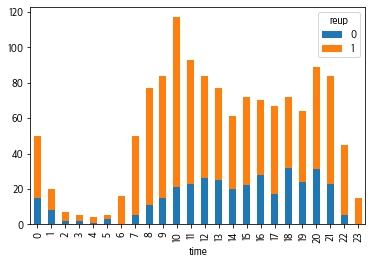

In [76]:
last_day.groupby([last_day['upload_datetime'].dt.hour, 'reup']).title.count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('time')